# Details


> EDA
>> It contains the following 6 fields:

    target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

    ids: The id of the tweet ( 2087)

    date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

    flag: The query (lyx). If there is no query, then this value is NO_QUERY.

    user: the user that tweeted (robotickilldozr)

    text: the text of the tweet (Lyx is cool)





- Downloading the data from kaggle

In [1]:
pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/kazanova/sentiment140")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anshalsingh
Your Kaggle Key: ··········


  6%|▌         | 5.00M/80.9M [00:00<00:01, 51.6MB/s]

100%|██████████| 80.9M/80.9M [00:00<00:00, 188MB/s] 


- Reading the data

In [7]:
import pandas as pd
df=pd.read_csv("./sentiment140/training.1600000.processed.noemoticon.csv",encoding='latin',header=None)

In [8]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Exploratory data analysis

In [19]:
df.shape

(1600000, 6)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   target    1600000 non-null  int64 
 1   id        1600000 non-null  int64 
 2   date      1600000 non-null  object
 3   query     1600000 non-null  object
 4   username  1600000 non-null  object
 5   content   1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [22]:
df.describe(include="all")

,target,id,date,query,username,content
count,1.600000e+06,1.600000e+06,1600000,1600000,1600000,1600000
unique,NaN,NaN,774363,1,659775,1581466
top,NaN,NaN,Mon Jun 15 12:53:14 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,NaN,NaN,20,1600000,549,210
mean,2.000000e+00,1.998818e+09,NaN,NaN,NaN,NaN
std,2.000001e+00,1.935761e+08,NaN,NaN,NaN,NaN
min,0.000000e+00,1.467810e+09,NaN,NaN,NaN,NaN
25%,0.000000e+00,1.956916e+09,NaN,NaN,NaN,NaN
50%,2.000000e+00,2.002102e+09,NaN,NaN,NaN,NaN
75%,4.000000e+00,2.177059e+09,NaN,NaN,NaN,NaN


In [9]:
#adding columns
df=df.rename(columns={0:'target',1:'id',2:'date',3:'query',4:'username',5:'content'})

In [10]:
df.head(1)

,target,id,date,query,username,content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."


In [12]:
#Checking for mising values
df.isnull().sum()

target      0
id          0
date        0
query       0
username    0
content     0
dtype: int64

- No missing values

- Checking the target column



In [13]:
df.target.value_counts()

4    800000
0    800000
Name: target, dtype: int64

- so no neutral :p

In [17]:
#for 0
df[df['target']==0]['content'].head(11)

0     @switchfoot http://twitpic.com/2y1zl - Awww, t...
1     is upset that he can't update his Facebook by ...
2     @Kenichan I dived many times for the ball. Man...
3       my whole body feels itchy and like its on fire 
4     @nationwideclass no, it's not behaving at all....
5                         @Kwesidei not the whole crew 
6                                           Need a hug 
7     @LOLTrish hey  long time no see! Yes.. Rains a...
8                  @Tatiana_K nope they didn't have it 
9                             @twittera que me muera ? 
10          spring break in plain city... it's snowing 
Name: content, dtype: object

- 0 is for negative

In [18]:
#for 4
df[df['target']==4]['content'].head(11)

800000         I LOVE @Health4UandPets u guys r the best!! 
800001    im meeting up with one of my besties tonight! ...
800002    @DaRealSunisaKim Thanks for the Twitter add, S...
800003    Being sick can be really cheap when it hurts t...
800004      @LovesBrooklyn2 he has that effect on everyone 
800005    @ProductOfFear You can tell him that I just bu...
800006    @r_keith_hill Thans for your response. Ihad al...
800007    @KeepinUpWKris I am so jealous, hope you had a...
800008    @tommcfly ah, congrats mr fletcher for finally...
800009    @e4VoIP I RESPONDED  Stupid cat is helping me ...
800010    crazy day of school. there for 10 hours straii...
Name: content, dtype: object

- 4 is posotive

In [29]:
# making 0 as neg and 4 as pos
df['target']=df['target'].replace([0,4],['Neg','Pos'])
print(df.target.value_counts())

Pos    800000
Neg    800000
Name: target, dtype: int64


In [30]:
un_tar=df.target.value_counts()

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

- pie chart for target column

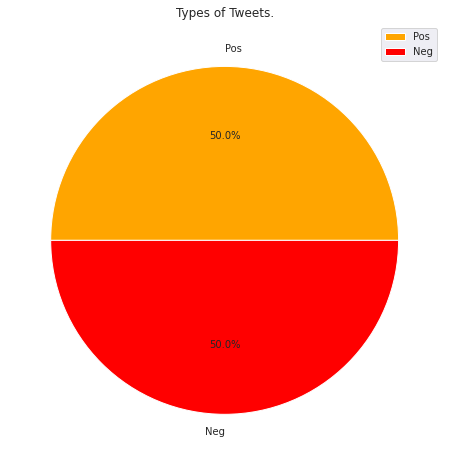

In [45]:
plt.figure(figsize=(8,8))
un_tar.plot(kind='pie',subplots=True,colors=['orange','red'],autopct='%.1f%%')
plt.title("Types of Tweets.",fontsize=12)
plt.legend()
plt.ylabel("")
plt.show()

In [46]:
df.columns

Index(['target', 'id', 'date', 'query', 'username', 'content'], dtype='object')

In [48]:
df.id.nunique()

1598315

In [56]:
df.content.head()

0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: content, dtype: object

In [58]:
#adding a length of tweet columns
df['length']=df.content.str.split().apply(len)

In [59]:
df.head(4)

,target,id,date,query,username,content,length
0,Neg,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19
1,Neg,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,21
2,Neg,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,18
3,Neg,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,10


In [62]:
#positive tweets length
pos=df[df['target']=='Pos']['length']
pos.head()

800000     8
800001    14
800002    27
800003    21
800004     7
Name: length, dtype: int64

In [73]:
print(pos.describe())

count    800000.000000
mean         12.770318
std           6.816371
min           1.000000
25%           7.000000
50%          12.000000
75%          18.000000
max          64.000000
Name: length, dtype: float64


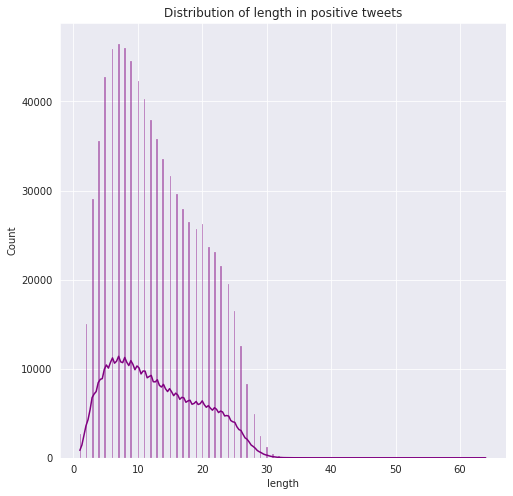

In [76]:
#distribution of length in positive tweets
plt.figure(figsize=(8,8))
sns.histplot(pos,color='purple',kde=True)
plt.title("Distribution of length in positive tweets")
plt.show()

In [78]:
#negative tweets length
neg=df[df['target']=='Neg']['length']
neg.head()

0    19
1    21
2    18
3    10
4    21
Name: length, dtype: int64

In [79]:
neg.describe()

count    800000.000000
mean         13.581984
std           7.073519
min           1.000000
25%           8.000000
50%          13.000000
75%          19.000000
max          57.000000
Name: length, dtype: float64

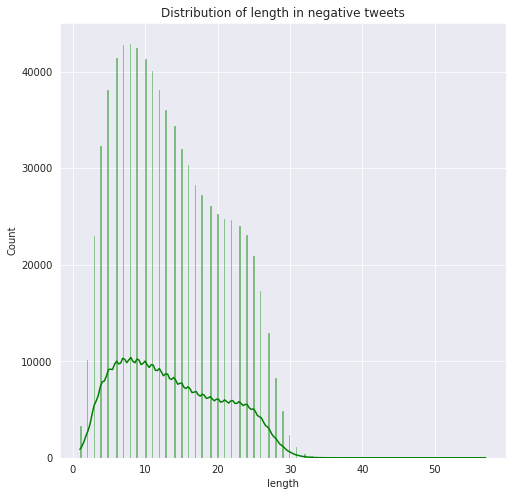

In [80]:
#distribution of length in negative tweets
plt.figure(figsize=(8,8))
sns.histplot(neg,color='green',kde=True)
plt.title("Distribution of length in negative tweets")
plt.show()

In [84]:
import numpy as np
print("Difference in mean Length of negative and positive:" ,np.mean(neg)-np.mean(pos))

Difference in mean Length of negative and positive: 0.8116662499999983


In [104]:
#Top tweeting users(pos)
un_tweeters_pos=df[df['target']=='Pos']['username'].value_counts()
un_tweeters_pos[:10]

what_bugs_u       246
DarkPiano         231
VioletsCRUK       218
tsarnick          212
keza34            211
shanajaca         204
TraceyHewins      193
ramdomthoughts    190
thisgoeshere      178
KevinEdwardsJr    171
Name: username, dtype: int64

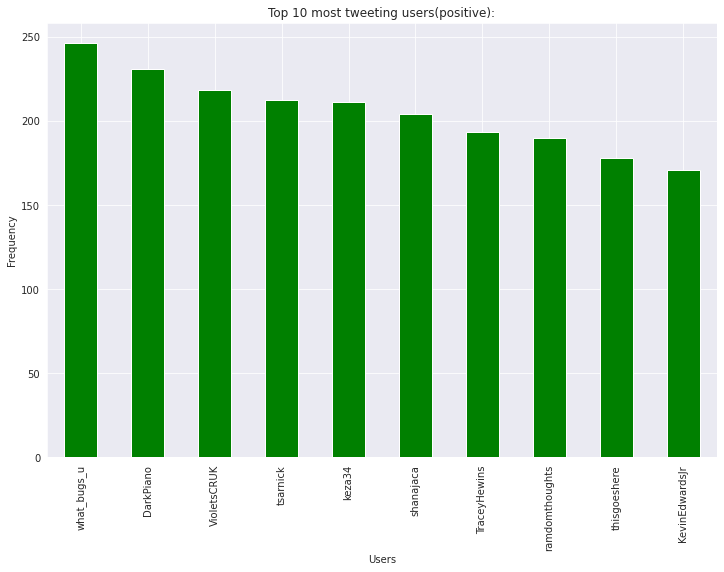

In [105]:
un_tweeters_pos[:10].plot(kind='bar',color='green',figsize=(12,8))
plt.title("Top 10 most tweeting users(positive):")
plt.xlabel("Users")
plt.ylabel("Frequency")
plt.show()

-what bugs u :)

In [102]:
df[df['username']=='what_bugs_u'].head(10)

,target,id,date,query,username,content,length
1141441,Pos,1977182027,Sat May 30 20:18:46 PDT 2009,NO_QUERY,what_bugs_u,@JadeMcCray why limit your story to 140 chr. T...,22
1141626,Pos,1977198277,Sat May 30 20:21:22 PDT 2009,NO_QUERY,what_bugs_u,@cadmiumcannibal why limit your story to 140 c...,22
1141648,Pos,1977207353,Sat May 30 20:22:52 PDT 2009,NO_QUERY,what_bugs_u,@RonanDosSantos why limit your story to 140 ch...,22
1141674,Pos,1977208245,Sat May 30 20:23:01 PDT 2009,NO_QUERY,what_bugs_u,@ShayMac28 why limit your story to 140 chr. Te...,22
1142667,Pos,1977331498,Sat May 30 20:43:12 PDT 2009,NO_QUERY,what_bugs_u,@lynnsdecor why limit your story to 140 chr. T...,22
1142790,Pos,1977351706,Sat May 30 20:46:44 PDT 2009,NO_QUERY,what_bugs_u,@EmStar32 why limit your story to 140 chr. Tel...,22
1162939,Pos,1979631288,Sun May 31 03:52:30 PDT 2009,NO_QUERY,what_bugs_u,@harry_matthews why limit your story to 140 ch...,22
1163802,Pos,1979706886,Sun May 31 04:10:39 PDT 2009,NO_QUERY,what_bugs_u,@nhiies why limit your story to 140 chr. Tell ...,22
1163951,Pos,1979716275,Sun May 31 04:13:02 PDT 2009,NO_QUERY,what_bugs_u,@Monza972 why limit your story to 140 chr. Tel...,22
1164024,Pos,1979723388,Sun May 31 04:14:48 PDT 2009,NO_QUERY,what_bugs_u,@dropdeadkimi why limit your story to 140 chr....,22


- using same tweet a lot of times ,could be a bot

In [106]:
#Top Negative Tweeters
un_tweeters_neg=df[df['target']=='Neg']['username'].value_counts()
un_tweeters_neg[:10]

lost_dog           549
tweetpet           310
webwoke            264
wowlew             210
mcraddictal        210
SallytheShizzle    183
_magic8ball        136
Dogbook            133
mrs_mcsupergirl    123
nuttychris         121
Name: username, dtype: int64

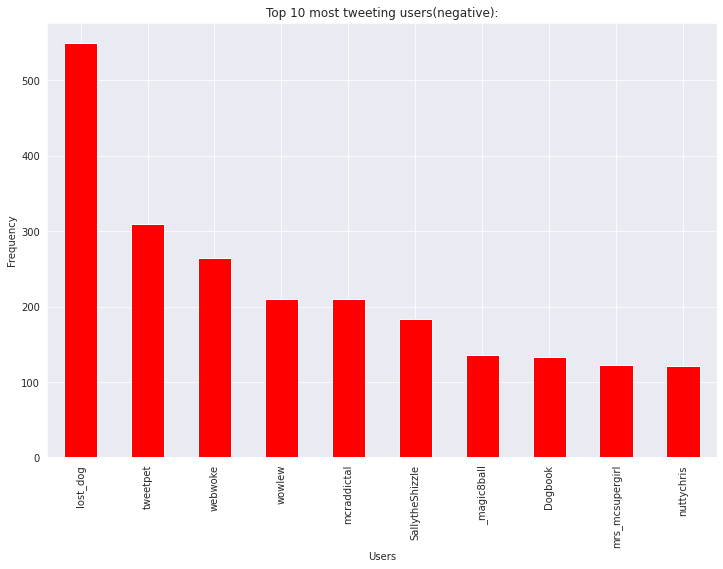

In [108]:
un_tweeters_neg[:10].plot(kind='bar',color='red',figsize=(12,8))
plt.title("Top 10 most tweeting users(negative):")
plt.xlabel("Users")
plt.ylabel("Frequency")
plt.show()

- The usernames wow

In [112]:
#lets see what lost_dog has been tweeting
df[df['username']=='lost_dog'].head(10)

,target,id,date,query,username,content,length
43935,Neg,1676704158,Fri May 01 22:54:02 PDT 2009,NO_QUERY,lost_dog,@NyleW I am lost. Please help me find a good h...,11
45574,Neg,1677189389,Sat May 02 00:51:35 PDT 2009,NO_QUERY,lost_dog,@SallyD I am lost. Please help me find a good ...,11
46919,Neg,1677519173,Sat May 02 02:30:50 PDT 2009,NO_QUERY,lost_dog,@zuppaholic I am lost. Please help me find a g...,11
47949,Neg,1677752995,Sat May 02 03:47:51 PDT 2009,NO_QUERY,lost_dog,@LOSTPETUSA I am lost. Please help me find a g...,11
50572,Neg,1678544903,Sat May 02 07:02:28 PDT 2009,NO_QUERY,lost_dog,@JeanLevertHood I am lost. Please help me find...,11
50854,Neg,1678661848,Sat May 02 07:22:48 PDT 2009,NO_QUERY,lost_dog,@irenerencsi I am lost. Please help me find a ...,11
55096,Neg,1684955706,Sat May 02 22:34:21 PDT 2009,NO_QUERY,lost_dog,@adevenish I am lost. Please help me find a go...,11
55656,Neg,1685161254,Sat May 02 23:16:53 PDT 2009,NO_QUERY,lost_dog,@LAmale I am lost. Please help me find a good ...,11
60808,Neg,1686517168,Sun May 03 05:45:51 PDT 2009,NO_QUERY,lost_dog,@bthenextstep I am lost. Please help me find a...,11
64297,Neg,1688009482,Sun May 03 10:07:29 PDT 2009,NO_QUERY,lost_dog,@DonaldDonnyDon I am lost. Please help me find...,11


In [113]:
df[df['username']=='wowlew'].head(10)

,target,id,date,query,username,content,length
99972,Neg,1793803394,Thu May 14 04:02:33 PDT 2009,NO_QUERY,wowlew,isPlayer Has Died! Sorry,4
100159,Neg,1793875823,Thu May 14 04:16:45 PDT 2009,NO_QUERY,wowlew,isPlayer Has Died! Sorry,4
100204,Neg,1793898439,Thu May 14 04:21:01 PDT 2009,NO_QUERY,wowlew,isPlayer Has Died! Sorry,4
100259,Neg,1793923840,Thu May 14 04:25:47 PDT 2009,NO_QUERY,wowlew,isPlayer Has Died! Sorry,4
102019,Neg,1794742412,Thu May 14 06:28:10 PDT 2009,NO_QUERY,wowlew,isPlayer Has Died! Sorry,4
102132,Neg,1794818607,Thu May 14 06:37:17 PDT 2009,NO_QUERY,wowlew,isPlayer Has Died! Sorry,4
102283,Neg,1794906243,Thu May 14 06:47:34 PDT 2009,NO_QUERY,wowlew,isPlayer Has Died! Sorry,4
102369,Neg,1794952416,Thu May 14 06:52:49 PDT 2009,NO_QUERY,wowlew,isPlayer Has Died! Sorry,4
102466,Neg,1795033582,Thu May 14 07:02:01 PDT 2009,NO_QUERY,wowlew,isPlayer Has Died! Sorry,4
102563,Neg,1795082604,Thu May 14 07:07:34 PDT 2009,NO_QUERY,wowlew,isPlayer Has Died! Sorry,4


- another bot it seems
- Most of the top tweeters seem to be bots

> Wordcloud for positive tweets

In [116]:
from wordcloud import WordCloud,STOPWORDS

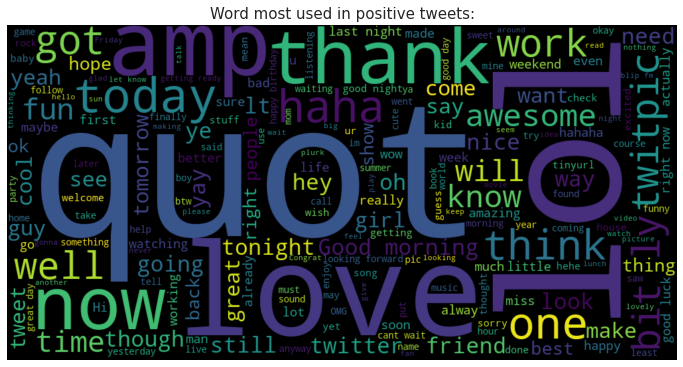

In [120]:
plt.figure(figsize=(12,10))
wc_pos=WordCloud(stopwords=STOPWORDS,max_words=200,width=1000,height=500,background_color='black').generate("".join(df[df.target=='Pos'].content))
plt.imshow(wc_pos,interpolation='bilinear')
plt.axis("off")
plt.title("Word most used in positive tweets:",fontsize=15)
plt.show()

> Wordcloud for negative tweets

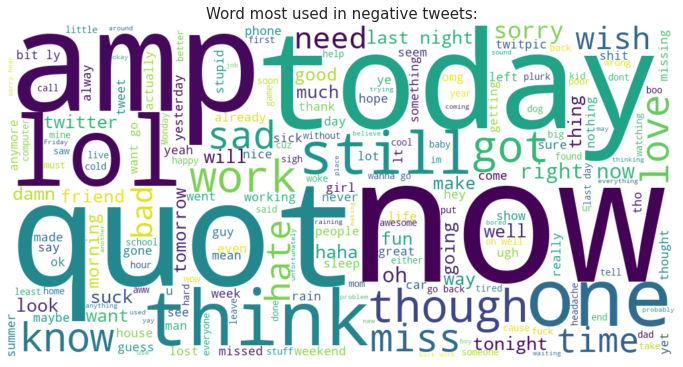

In [121]:
plt.figure(figsize=(12,10))
wc_pos=WordCloud(stopwords=STOPWORDS,max_words=200,width=1000,height=500,background_color='white').generate("".join(df[df.target=='Neg'].content))
plt.imshow(wc_pos,interpolation='bilinear')
plt.axis("off")
plt.title("Word most used in negative tweets:",fontsize=15)
plt.show()

- much of the words used most are similar in both kind of tweets